# 1. Import libraries

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Import Dataset

In [270]:
drug_dataset = pd.read_csv('Drugs.csv')
x = drug_dataset.iloc[:, :-1].values
y = drug_dataset.iloc[:, -1].values

In [271]:
print(drug_dataset)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [272]:
print(x)

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]
 [22 'F' 'NORMAL' 'HIGH' 8.607]
 [49 'F' 'NORMAL' 'HIGH' 16.275]
 [41 'M' 'LOW' 'HIGH' 11.037]
 [60 'M' 'NORMAL' 'HIGH' 15.171]
 [43 'M' 'LOW' 'NORMAL' 19.368]
 [47 'F' 'LOW' 'HIGH' 11.767]
 [34 'F' 'HIGH' 'NORMAL' 19.199]
 [43 'M' 'LOW' 'HIGH' 15.376]
 [74 'F' 'LOW' 'HIGH' 20.942]
 [50 'F' 'NORMAL' 'HIGH' 12.703]
 [16 'F' 'HIGH' 'NORMAL' 15.516]
 [69 'M' 'LOW' 'NORMAL' 11.455]
 [43 'M' 'HIGH' 'HIGH' 13.972]
 [23 'M' 'LOW' 'HIGH' 7.298]
 [32 'F' 'HIGH' 'NORMAL' 25.974]
 [57 'M' 'LOW' 'NORMAL' 19.128]
 [63 'M' 'NORMAL' 'HIGH' 25.917]
 [47 'M' 'LOW' 'NORMAL' 30.568]
 [48 'F' 'LOW' 'HIGH' 15.036]
 [33 'F' 'LOW' 'HIGH' 33.486]
 [28 'F' 'HIGH' 'NORMAL' 18.809]
 [31 'M' 'HIGH' 'HIGH' 30.366]
 [49 'F' 'NORMAL' 'NORMAL' 9.381]
 [39 'F' 'LOW' 'NORMAL' 22.697]
 [45 'M' 'LOW' 'HIGH' 17.951]
 [18 'F' 'NORMAL' 'NORMAL' 8.75]
 [74 'M' 'HIGH' 'HIGH' 

In [273]:
x.shape

(200, 5)

In [274]:
y.shape

(200,)

# Data Preprocessing 

# Encoding categorical values into numerical data because part of regression formula was combined with sigmoid function to create in its equation or formula to help predict a binary classfied output 

In [275]:
"""
(Optional)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
OneEn = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', OneEn, [1,3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
"""
#encodes categorial values to numeric in alphabatical order
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder()
x[:, 1] = le_x.fit_transform(x[:, 1])
x[:, 2] = le_x.fit_transform(x[:, 2])



In [276]:
print(x)

[[23 0 0 'HIGH' 25.355]
 [47 1 1 'HIGH' 13.093]
 [47 1 1 'HIGH' 10.114]
 [28 0 2 'HIGH' 7.798]
 [61 0 1 'HIGH' 18.043]
 [22 0 2 'HIGH' 8.607]
 [49 0 2 'HIGH' 16.275]
 [41 1 1 'HIGH' 11.037]
 [60 1 2 'HIGH' 15.171]
 [43 1 1 'NORMAL' 19.368]
 [47 0 1 'HIGH' 11.767]
 [34 0 0 'NORMAL' 19.199]
 [43 1 1 'HIGH' 15.376]
 [74 0 1 'HIGH' 20.942]
 [50 0 2 'HIGH' 12.703]
 [16 0 0 'NORMAL' 15.516]
 [69 1 1 'NORMAL' 11.455]
 [43 1 0 'HIGH' 13.972]
 [23 1 1 'HIGH' 7.298]
 [32 0 0 'NORMAL' 25.974]
 [57 1 1 'NORMAL' 19.128]
 [63 1 2 'HIGH' 25.917]
 [47 1 1 'NORMAL' 30.568]
 [48 0 1 'HIGH' 15.036]
 [33 0 1 'HIGH' 33.486]
 [28 0 0 'NORMAL' 18.809]
 [31 1 0 'HIGH' 30.366]
 [49 0 2 'NORMAL' 9.381]
 [39 0 1 'NORMAL' 22.697]
 [45 1 1 'HIGH' 17.951]
 [18 0 2 'NORMAL' 8.75]
 [74 1 0 'HIGH' 9.567]
 [49 1 1 'NORMAL' 11.014]
 [65 0 0 'NORMAL' 31.876]
 [53 1 2 'HIGH' 14.133]
 [46 1 2 'NORMAL' 7.285]
 [32 1 0 'NORMAL' 9.445]
 [39 1 1 'NORMAL' 13.938]
 [39 0 2 'NORMAL' 9.709]
 [15 1 2 'HIGH' 9.084]
 [73 0 2 'HIGH' 1

In [277]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
OneEn = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', OneEn, [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [278]:
with np.printoptions(threshold=np.inf):
  print(x)

[[1.0 0.0 23 0 0 25.355]
 [1.0 0.0 47 1 1 13.093]
 [1.0 0.0 47 1 1 10.114]
 [1.0 0.0 28 0 2 7.798]
 [1.0 0.0 61 0 1 18.043]
 [1.0 0.0 22 0 2 8.607]
 [1.0 0.0 49 0 2 16.275]
 [1.0 0.0 41 1 1 11.037]
 [1.0 0.0 60 1 2 15.171]
 [0.0 1.0 43 1 1 19.368]
 [1.0 0.0 47 0 1 11.767]
 [0.0 1.0 34 0 0 19.199]
 [1.0 0.0 43 1 1 15.376]
 [1.0 0.0 74 0 1 20.942]
 [1.0 0.0 50 0 2 12.703]
 [0.0 1.0 16 0 0 15.516]
 [0.0 1.0 69 1 1 11.455]
 [1.0 0.0 43 1 0 13.972]
 [1.0 0.0 23 1 1 7.298]
 [0.0 1.0 32 0 0 25.974]
 [0.0 1.0 57 1 1 19.128]
 [1.0 0.0 63 1 2 25.917]
 [0.0 1.0 47 1 1 30.568]
 [1.0 0.0 48 0 1 15.036]
 [1.0 0.0 33 0 1 33.486]
 [0.0 1.0 28 0 0 18.809]
 [1.0 0.0 31 1 0 30.366]
 [0.0 1.0 49 0 2 9.381]
 [0.0 1.0 39 0 1 22.697]
 [1.0 0.0 45 1 1 17.951]
 [0.0 1.0 18 0 2 8.75]
 [1.0 0.0 74 1 0 9.567]
 [0.0 1.0 49 1 1 11.014]
 [0.0 1.0 65 0 0 31.876]
 [1.0 0.0 53 1 2 14.133]
 [0.0 1.0 46 1 2 7.285]
 [0.0 1.0 32 1 0 9.445]
 [0.0 1.0 39 1 1 13.938]
 [0.0 1.0 39 0 2 9.709]
 [1.0 0.0 15 1 2 9.084]
 [1.0 0.0 7

In [279]:
count_zerox = (x == 0).sum()
print(count_zerox)

373


In [280]:
count_onex = (x == 1).sum()
print(count_onex)

368


# Spilt the Dataset

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [282]:
print(x_train)

[[1.0 0.0 42 0 0 21.036]
 [1.0 0.0 29 1 0 12.856]
 [1.0 0.0 31 1 0 30.366]
 [0.0 1.0 65 0 1 13.769]
 [0.0 1.0 51 0 1 23.003]
 [0.0 1.0 45 1 1 8.37]
 [1.0 0.0 60 1 2 15.171]
 [0.0 1.0 26 1 1 20.909]
 [0.0 1.0 32 0 0 10.292]
 [0.0 1.0 74 1 0 15.436]
 [1.0 0.0 28 0 2 19.675]
 [0.0 1.0 53 0 0 12.495]
 [1.0 0.0 18 0 0 37.188]
 [1.0 0.0 56 0 0 25.395]
 [1.0 0.0 22 1 1 8.151]
 [1.0 0.0 33 0 1 33.486]
 [0.0 1.0 18 0 2 8.75]
 [1.0 0.0 30 0 2 10.443]
 [1.0 0.0 73 0 2 19.221]
 [0.0 1.0 65 1 0 11.34]
 [0.0 1.0 52 1 1 32.922]
 [1.0 0.0 58 0 1 38.247]
 [1.0 0.0 59 0 2 13.884]
 [0.0 1.0 32 0 0 25.974]
 [0.0 1.0 72 0 1 14.642]
 [1.0 0.0 29 0 0 29.45]
 [0.0 1.0 68 0 0 10.189]
 [0.0 1.0 21 0 0 28.632]
 [0.0 1.0 67 1 2 10.898]
 [1.0 0.0 51 0 2 13.597]
 [1.0 0.0 69 0 2 10.065]
 [1.0 0.0 62 1 2 16.594]
 [1.0 0.0 35 0 0 12.894]
 [1.0 0.0 45 0 0 12.854]
 [1.0 0.0 39 1 0 9.664]
 [0.0 1.0 50 0 2 17.211]
 [1.0 0.0 23 1 2 16.85]
 [1.0 0.0 50 0 2 12.703]
 [0.0 1.0 49 0 2 9.381]
 [0.0 1.0 64 0 1 25.741]
 [1.0 0.0 

In [283]:
x_train.shape

(160, 6)

In [284]:
print(x_test)
x_test.shape

[[1.0 0.0 23 1 1 7.298]
 [1.0 0.0 28 0 2 12.879]
 [1.0 0.0 42 1 1 20.013]
 [0.0 1.0 20 1 0 35.639]
 [1.0 0.0 25 1 2 19.011]
 [0.0 1.0 20 0 1 11.686]
 [1.0 0.0 22 0 2 8.607]
 [0.0 1.0 37 0 1 12.006]
 [1.0 0.0 43 1 1 15.376]
 [0.0 1.0 55 1 2 7.261]
 [0.0 1.0 24 1 0 9.475]
 [0.0 1.0 19 0 0 25.969]
 [0.0 1.0 22 0 0 22.818]
 [0.0 1.0 37 1 1 16.724]
 [1.0 0.0 60 1 0 13.934]
 [1.0 0.0 41 1 1 11.037]
 [0.0 1.0 65 0 0 31.876]
 [1.0 0.0 70 0 2 20.489]
 [0.0 1.0 39 1 1 13.938]
 [0.0 1.0 31 1 0 17.069]
 [0.0 1.0 36 0 0 15.49]
 [1.0 0.0 61 1 2 9.443]
 [0.0 1.0 66 0 2 8.107]
 [0.0 1.0 34 0 1 12.923]
 [0.0 1.0 38 0 1 29.875]
 [1.0 0.0 36 0 2 16.753]
 [1.0 0.0 67 0 2 15.891]
 [0.0 1.0 57 0 2 25.893]
 [1.0 0.0 34 1 2 22.456]
 [0.0 1.0 50 0 2 12.295]
 [0.0 1.0 69 1 1 11.455]
 [1.0 0.0 26 0 1 14.16]
 [0.0 1.0 49 1 0 8.7]
 [0.0 1.0 47 0 2 6.683]
 [0.0 1.0 47 1 1 30.568]
 [0.0 1.0 64 1 0 20.932]
 [1.0 0.0 32 0 2 7.477]
 [1.0 0.0 61 0 1 18.043]
 [0.0 1.0 38 0 0 11.326]
 [1.0 0.0 22 1 2 11.953]]


(40, 6)

In [285]:
print(y_test)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX']


# 4. Train the Logistic Regression model on train data

In [286]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# 5. Test the model

In [287]:
print(y_test)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX']


In [288]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['DrugY' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugA' 'drugB']
 ['drugC' 'drugC']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'drugC']
 ['drugB' 'drugA']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['DrugY' 'drugX']]


In [289]:
#how many is predicted right
numofPrediction_isCorrect = (y_pred == y_test).sum()
print(numofPrediction_isCorrect)

#how many is predicted wrong
numofPrediction_isIncorrect = (y_pred != y_test).sum()
print(numofPrediction_isIncorrect)

#how many predictions all together
count = 0
for c in range(len(y_pred)):
   count = count + 1

print(count)

33
7
40


# 6. Confusion Matrix and Accuracy of Model

In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0  0  1]
 [ 0  2  1  0  0]
 [ 0  1  0  0  0]
 [ 1  0  0  2  0]
 [ 3  0  0  0 11]]


In [291]:
p = accuracy_score(y_test, y_pred)
print(p * 100)

82.5


# Visualize Confusion Matrix better with Seaborn

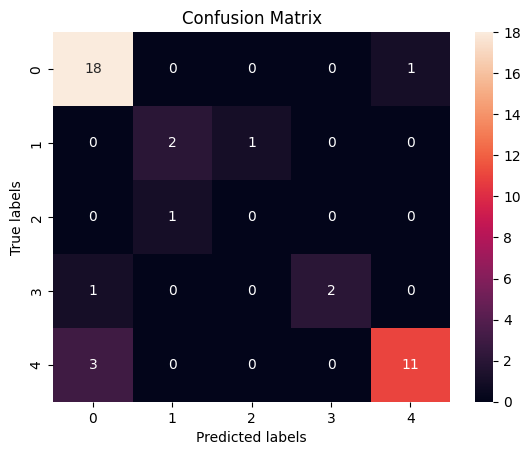

In [292]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

#labels, titles and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4']);ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4']);

# Optimize Model

### 1. Adjust class weights to lower class imbalance in distributions of instances in the dataset and less bias to come in the Model.

### Without Feature Scaling

In [293]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, class_weight='balanced')
classifier.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [294]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugB' 'drugB']
 ['drugC' 'drugC']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'drugC']
 ['drugB' 'drugA']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['drugX' 'drugX']]


In [295]:
p = accuracy_score(y_test, y_pred)
print(p * 100)

90.0


### 2. Feature Scale on some variance between feature like weight and length can be lowered by scaling the features to be in the same scale.

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [297]:
print(x_train)

[[ 9.27612590e-01 -9.27612590e-01 -1.82964966e-01 -1.06458129e+00
  -1.05481901e+00  6.89673485e-01]
 [ 9.27612590e-01 -9.27612590e-01 -9.66024903e-01  9.39336437e-01
  -1.05481901e+00 -4.49466986e-01]
 [ 9.27612590e-01 -9.27612590e-01 -8.45554143e-01  9.39336437e-01
  -1.05481901e+00  1.98896207e+00]
 [-1.07803625e+00  1.07803625e+00  1.20244877e+00 -1.06458129e+00
   1.68159552e-01 -3.22323313e-01]
 [-1.07803625e+00  1.07803625e+00  3.59153452e-01 -1.06458129e+00
   1.68159552e-01  9.63596384e-01]
 [-1.07803625e+00  1.07803625e+00 -2.25882674e-03  9.39336437e-01
   1.68159552e-01 -1.07418388e+00]
 [ 9.27612590e-01 -9.27612590e-01  9.01271870e-01  9.39336437e-01
   1.39113811e+00 -1.27081877e-01]
 [-1.07803625e+00  1.07803625e+00 -1.14673104e+00  9.39336437e-01
   1.68159552e-01  6.71987564e-01]
 [-1.07803625e+00  1.07803625e+00 -7.85318764e-01 -1.06458129e+00
  -1.05481901e+00 -8.06527643e-01]
 [-1.07803625e+00  1.07803625e+00  1.74456719e+00  9.39336437e-01
  -1.05481901e+00 -9.0178

In [301]:
#retrain model with class imbalance
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [302]:
#repredict test results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugB' 'drugB']
 ['drugC' 'drugC']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugC' 'drugC']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['drugC' 'drugX']]


In [303]:
p = accuracy_score(y_test, y_pred)
print(p * 100)

95.0
